# New York City Crime Data
## For the Years: 2014 - 2015

Written by:
**Sarah Clark** and **Peng Xu**

For our final project we present New York City Crime Data for the years 2014-2015.  
We found our dataset from www.kaggle.com at the following address: https://www.kaggle.com/adamschroeder/crimes-new-york-city.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas as pd
from pylab import rcParams
import re


plt.rcParams['font.family'] = "serif"

### Data Explore and Data Cleaning:
#### Part 1: How many features in the dataset and what data types are they? Do they have missing data?
We will focus on the questions that we will address.
#### Part 2: How many rows are in 2014-2015?
We will only select the year between 2014 and 2015.

In [2]:
NYC = pd.read_csv("NYPD_Complaint_Data_Historic.csv")
NYC.info()
NYC.isnull().sum()

C:\Users\gary_\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
CMPLNT_NUM           1048575 non-null int64
CMPLNT_FR_DT         1048510 non-null object
CMPLNT_FR_TM         1048575 non-null object
CMPLNT_TO_DT         842616 non-null object
CMPLNT_TO_TM         843002 non-null object
RPT_DT               1048575 non-null object
KY_CD                1048575 non-null int64
OFNS_DESC            1045695 non-null object
PD_CD                1047842 non-null float64
PD_DESC              1047842 non-null object
CRM_ATPT_CPTD_CD     1048574 non-null object
LAW_CAT_CD           1048575 non-null object
JURIS_DESC           1048575 non-null object
BORO_NM              1048575 non-null object
ADDR_PCT_CD          1048574 non-null float64
LOC_OF_OCCUR_DESC    830823 non-null object
PREM_TYP_DESC        1043886 non-null object
PARKS_NM             7599 non-null object
HADEVELOPT           51772 non-null object
X_COORD_CD           1016158 non-null fl

CMPLNT_NUM                 0
CMPLNT_FR_DT              65
CMPLNT_FR_TM               0
CMPLNT_TO_DT          205959
CMPLNT_TO_TM          205573
RPT_DT                     0
KY_CD                      0
OFNS_DESC               2880
PD_CD                    733
PD_DESC                  733
CRM_ATPT_CPTD_CD           1
LAW_CAT_CD                 0
JURIS_DESC                 0
BORO_NM                    0
ADDR_PCT_CD                1
LOC_OF_OCCUR_DESC     217752
PREM_TYP_DESC           4689
PARKS_NM             1040976
HADEVELOPT            996803
X_COORD_CD             32417
Y_COORD_CD             32417
Latitude               32417
Longitude              32417
Lat_Lon                32417
dtype: int64

In [3]:
# Extract year and only select the event happped in 2014 or 2015
df = NYC
year = [date[-4:] for date in df.RPT_DT]
df["year"] = year
df = df[(df["year"] == "2014") | (df["year"] == "2015")]

### QUESTION 1:
#### Part 1: How many of each type of crime is reported for all of New York City?
For this question, we look at the whole of New York City and report the 20 most reported crimes. 

Text(0,0.5,'Crime Description')

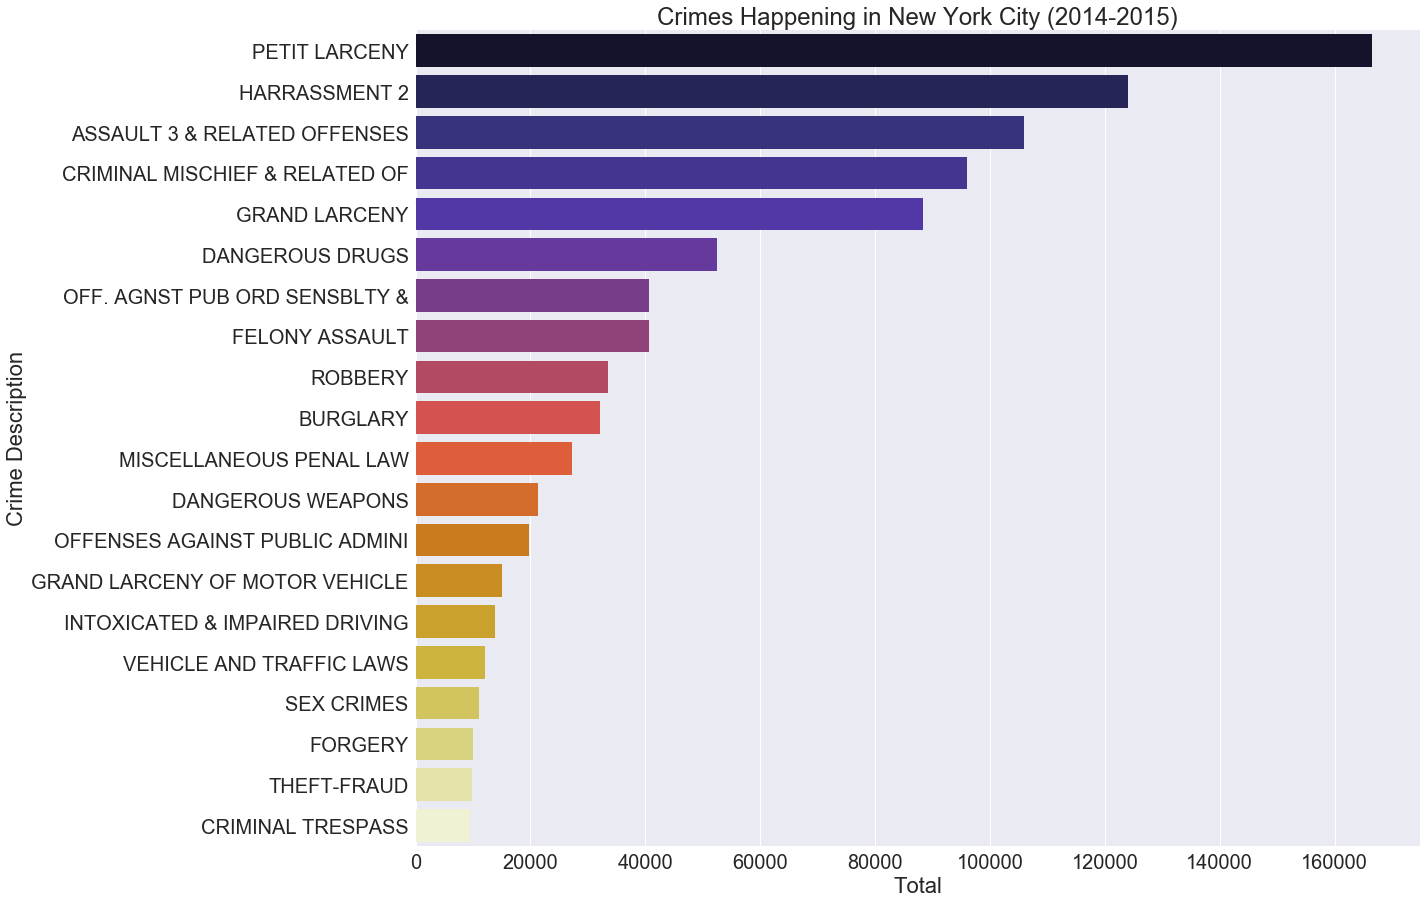

In [4]:
#Part 1
plt.rcParams['figure.figsize'] = (18.00, 15.0)
sns.set(font_scale=2.0)
ax = sns.countplot(y= df.OFNS_DESC, data=df, palette = "CMRmap", 
                       order= df['OFNS_DESC'].value_counts().iloc[:20].index ) 
ax.set_title('Crimes Happening in New York City (2014-2015)')
plt.xlabel("Total")
plt.ylabel("Crime Description")

#### Part 2: Differences in crime that exist between the five boroughs.
For this question, we look at each separate borough of New York City: Manhattan, Staten Island, The Bronx, Brooklyn and Queens. For each we see top 5 crimes committed and report similarities and differences.

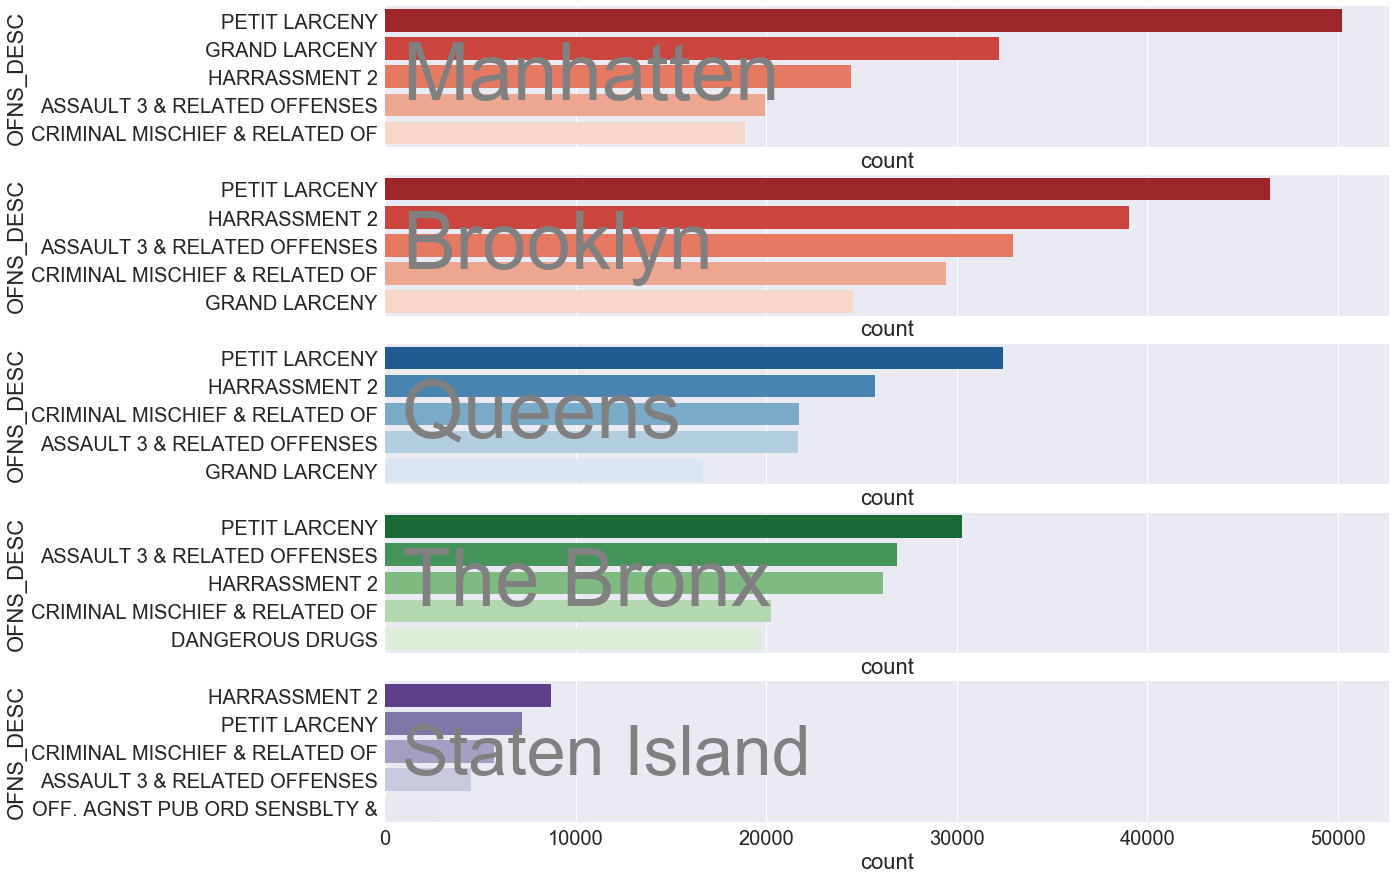

In [5]:
#part 2
dfBronx = df[(df.BORO_NM == 'BRONX')] 
dfManhatten = df[(df.BORO_NM == 'MANHATTAN')] 
dfQueens = df[(df.BORO_NM == 'QUEENS')] 
dfBrooklyn = df[(df.BORO_NM == 'BROOKLYN')]
dfStaten = df[(df.BORO_NM == 'STATEN ISLAND')]

fig, ax =plt.subplots(5, sharex='col')
plt.rcParams['figure.figsize'] = (15.00, 15.0)

sns.set(font_scale=1)
ax[0].text(900, 2.8,  "Manhatten", fontsize = 80, color='gray')
sns.countplot(y = dfManhatten['OFNS_DESC'], ax=ax[0], palette = "Reds_r",
              order= dfManhatten['OFNS_DESC'].value_counts().iloc[:5].index ) 
ax[1].text(900, 2.8,  "Brooklyn", fontsize = 80, color='gray')
sns.countplot(y = dfBrooklyn['OFNS_DESC'], ax=ax[1], palette = "Reds_r",
              order= dfBrooklyn['OFNS_DESC'].value_counts().iloc[:5].index )
ax[2].text(900, 2.8,  "Queens", fontsize = 80, color='gray')
sns.countplot(y = dfQueens['OFNS_DESC'], ax=ax[2], palette = "Blues_r",
              order= dfQueens['OFNS_DESC'].value_counts().iloc[:5].index ) 
ax[3].text(900, 2.8,  "The Bronx", fontsize = 80, color='gray')
sns.countplot(y = dfBronx['OFNS_DESC'], ax=ax[3], palette = "Greens_r",
             order= dfBronx['OFNS_DESC'].value_counts().iloc[:5].index) 
ax[4].text(900, 2.8,  "Staten Island", fontsize =70, color='gray')
sns.countplot(y = dfStaten['OFNS_DESC'], ax=ax[4], palette = "Purples_r",
              order= dfStaten['OFNS_DESC'].value_counts().iloc[:5].index ) 

#### Part 3: Felony vs. Misdemeanor vs. Violation

Text(0.5,0,'Category')

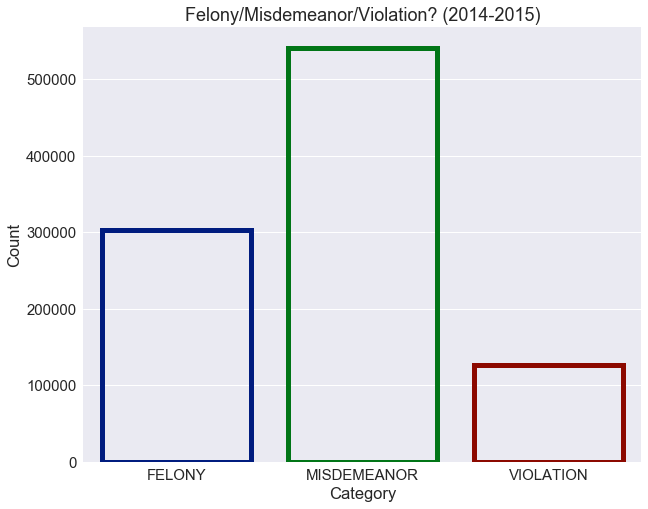

In [6]:
category = pd.DataFrame(df['LAW_CAT_CD'])

plt.rcParams['figure.figsize'] = (10.00, 8.0)
sns.set(font_scale=1.5)
ax = sns.countplot(x= 'LAW_CAT_CD', data=category, facecolor=(0, 0, 0, 0), linewidth = 5, edgecolor=sns.color_palette("dark", 3)) 
ax.set_title('Felony/Misdemeanor/Violation? (2014-2015)')
plt.ylabel("Count")
plt.xlabel("Category")

### QUESTION 2:
#### Where do the most dangerous crimes happen physically? (In a residence, on the street, in a public building?)
##### Part 1: All of New York City

Text(0,0.5,'Location Description')

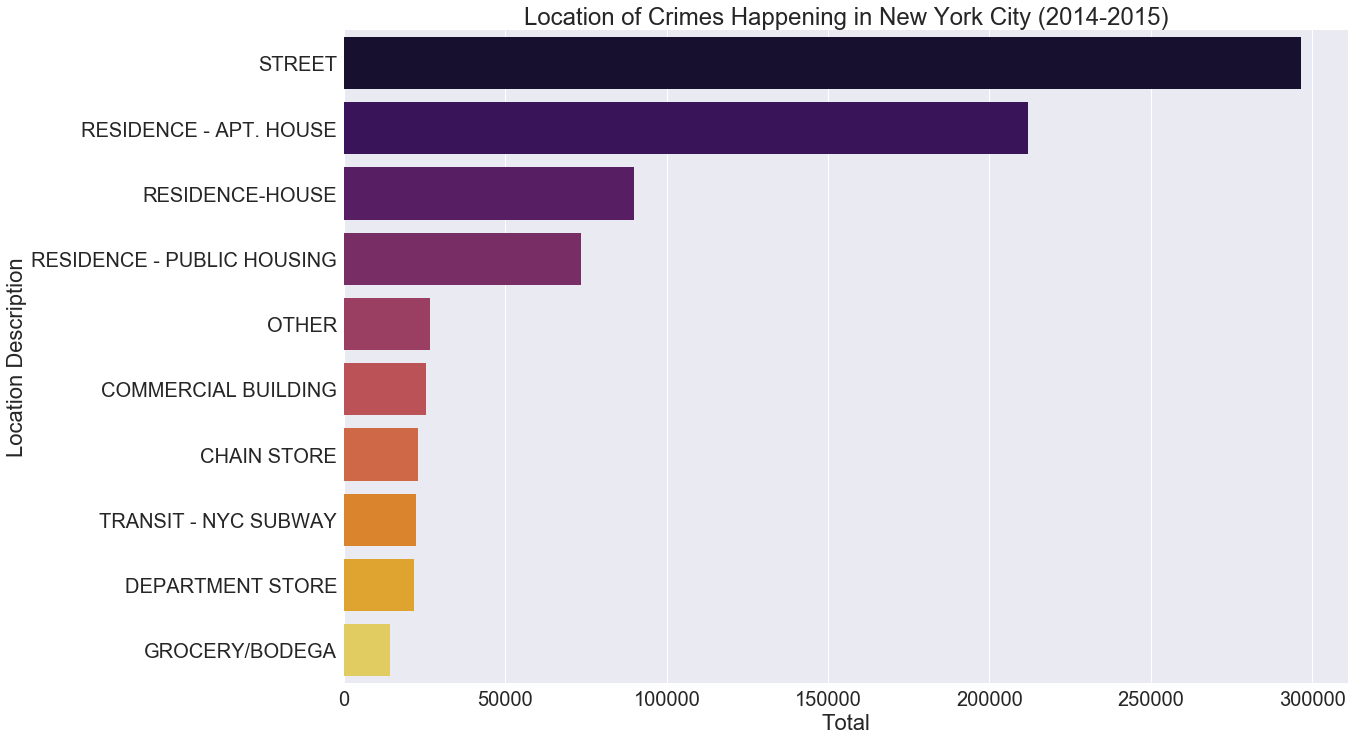

In [7]:
#Part 1:
# what % is the first four location
plt.rcParams['figure.figsize'] = (18.00, 12.0)
sns.set(font_scale=2.)
ax = sns.countplot(y= df.PREM_TYP_DESC, data=df, palette = "inferno", 
                       order= df['PREM_TYP_DESC'].value_counts().iloc[:10].index ) 
ax.set_title('Location of Crimes Happening in New York City (2014-2015)')
plt.xlabel("Total")
plt.ylabel("Location Description")

##### Part 2: Comparison of each Burough.  

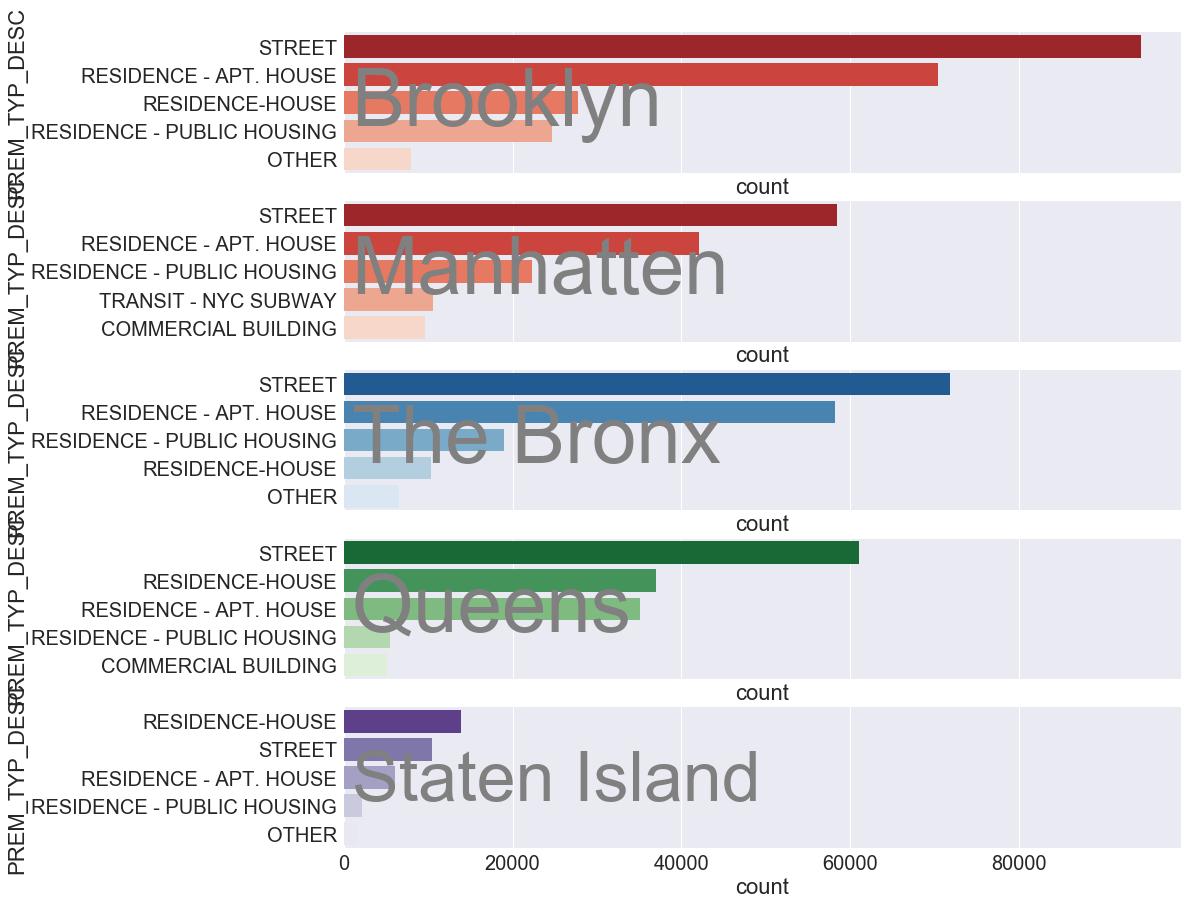

In [8]:
plt.rcParams['figure.figsize'] = (15.00, 15.0)
fig, ax =plt.subplots(5, sharex='col')

sns.set(font_scale=1, style="whitegrid")
ax[0].text(900, 2.8,  "Brooklyn", fontsize = 80, color='gray')
sns.countplot(y = dfBrooklyn['PREM_TYP_DESC'], ax=ax[0], palette = "Reds_r",
              order= dfBrooklyn['PREM_TYP_DESC'].value_counts().iloc[:5].index )

ax[1].text(900, 2.8,  "Manhatten", fontsize = 80, color='gray')
sns.countplot(y = dfManhatten['PREM_TYP_DESC'], ax=ax[1], palette = "Reds_r",
              order= dfManhatten['PREM_TYP_DESC'].value_counts().iloc[:5].index ) 

ax[2].text(900, 2.8,  "The Bronx", fontsize = 80, color='gray')
sns.countplot(y = dfBronx['PREM_TYP_DESC'], ax=ax[2], palette = "Blues_r",
             order= dfBronx['PREM_TYP_DESC'].value_counts().iloc[:5].index)

ax[3].text(900, 2.8,  "Queens", fontsize = 80, color='gray')
sns.countplot(y = dfQueens['PREM_TYP_DESC'], ax=ax[3], palette = "Greens_r",
              order= dfQueens['PREM_TYP_DESC'].value_counts().iloc[:5].index ) 

ax[4].text(900, 2.8,  "Staten Island", fontsize =70, color='gray')
sns.countplot(y = dfStaten['PREM_TYP_DESC'], ax=ax[4], palette = "Purples_r",
              order= dfStaten['PREM_TYP_DESC'].value_counts().iloc[:5].index )


### QUESTION 3:
#### What park in NYC do the most dangerous crimes happen? 
##### Part 1: Top 20 

Text(0,0.5,'Park Name')

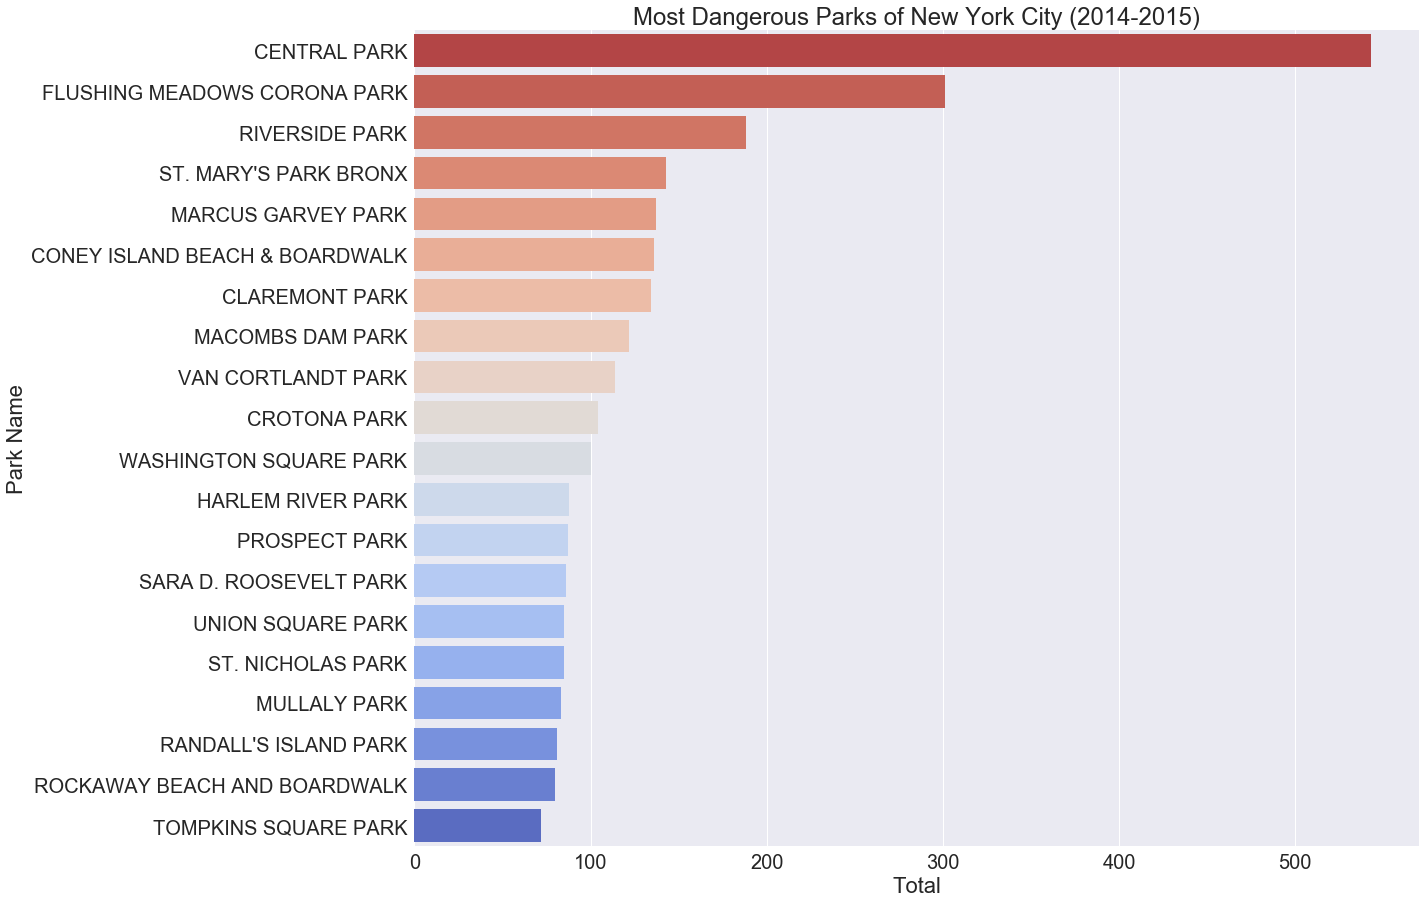

In [9]:
plt.rcParams['figure.figsize'] = (18.00, 15.0)
sns.set(font_scale=2.)
ax = sns.countplot(y= df.PARKS_NM, data=df, palette = "coolwarm_r", order= df['PARKS_NM'].value_counts().iloc[:20].index) 
ax.set_title('Most Dangerous Parks of New York City (2014-2015)')
plt.xlabel("Total")
plt.ylabel("Park Name")

Text(0,0.5,'Crime')

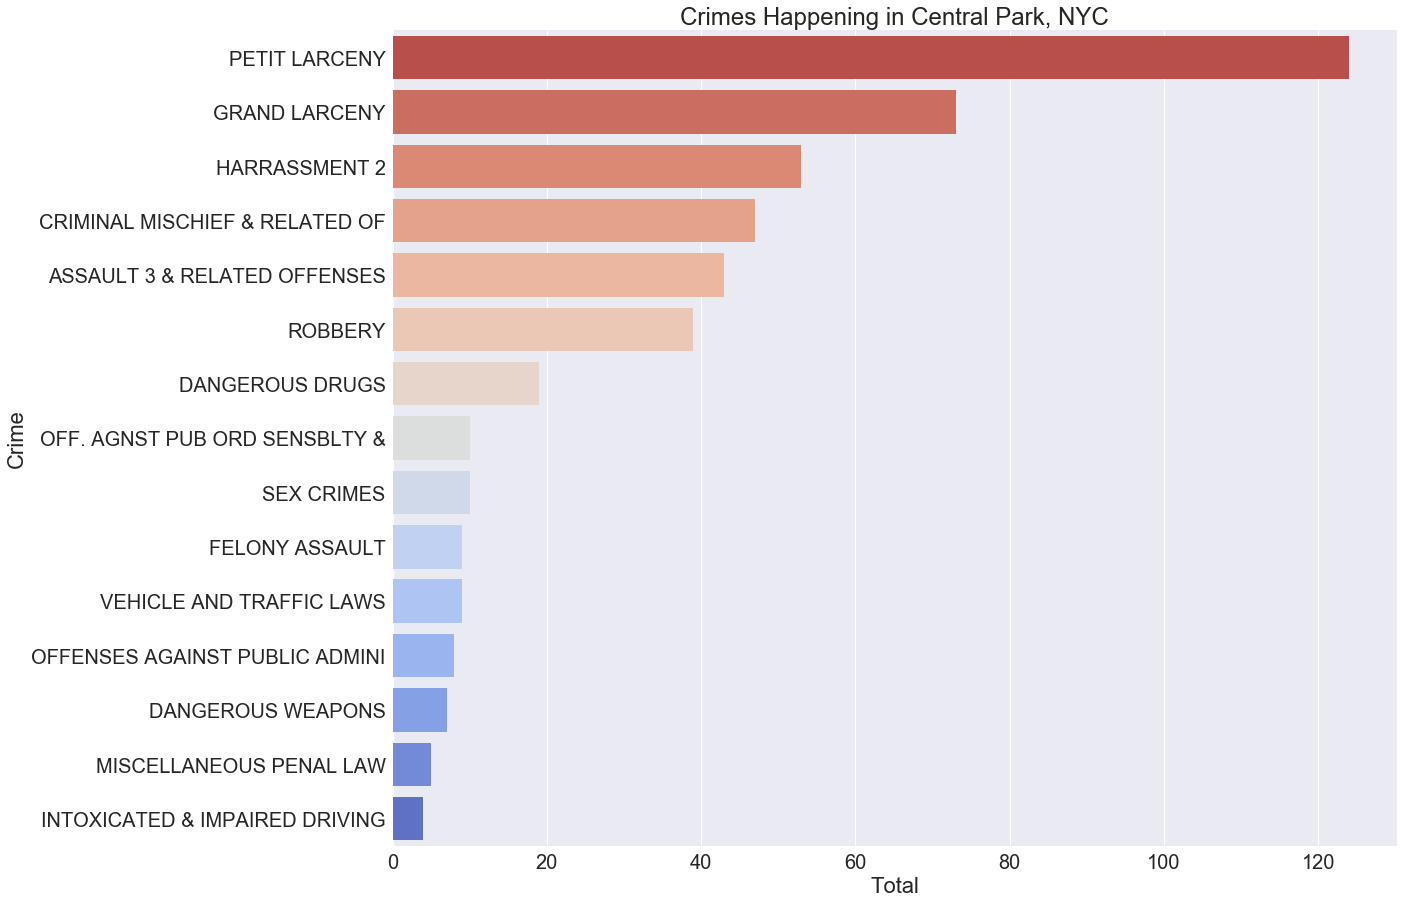

In [10]:
cpark = df[(df.PARKS_NM == 'CENTRAL PARK')]
ax = sns.countplot(y= cpark.OFNS_DESC, data=cpark, palette = "coolwarm_r", order= cpark.OFNS_DESC.value_counts().iloc[:15].index) 
ax.set_title('Crimes Happening in Central Park, NYC')
plt.xlabel("Total")
plt.ylabel("Crime")


### QUESTION 4:
#### How fast are law enforcement officers responding? Are these crimes being successfully completed, or attempted but failed or was interrupted prematurely?
##### Part 1: All of New York City

Text(0.5,0,'Completed/Attempted')

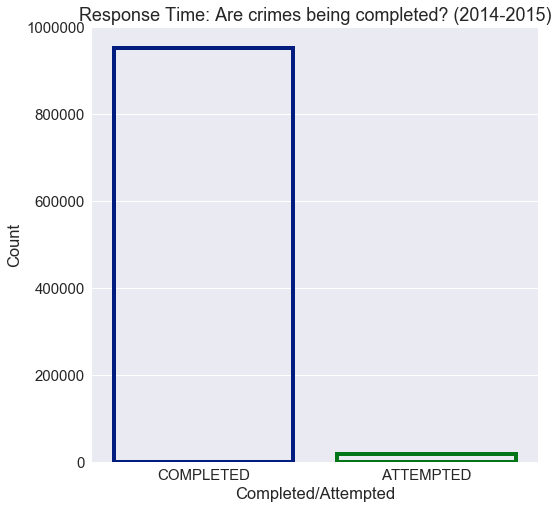

In [11]:
#Part 1:
compAttempt = pd.DataFrame(df['CRM_ATPT_CPTD_CD'])

plt.rcParams['figure.figsize'] = (8.00, 8.0)
sns.set(font_scale=1.5)
ax = sns.countplot(x= 'CRM_ATPT_CPTD_CD', data=compAttempt, facecolor=(0, 0, 0, 0),linewidth=4, edgecolor=sns.color_palette("dark", 2), 
                       order= compAttempt['CRM_ATPT_CPTD_CD'].value_counts().iloc[:10].index ) 
ax.set_title('Response Time: Are crimes being completed? (2014-2015)')
plt.ylabel("Count")
plt.xlabel("Completed/Attempted")

##### Part 2: Comparison of each Borough.  

Text(0,0.5,'Burough')

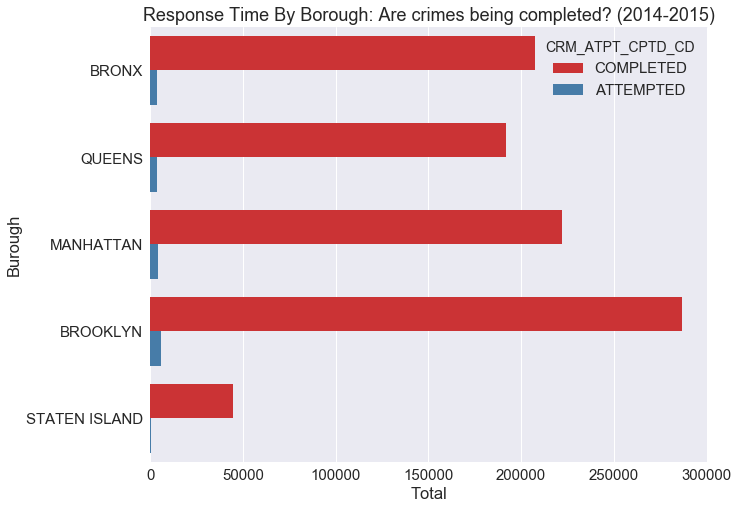

In [12]:
#Part 2

plt.rcParams['figure.figsize'] = (10.00, 8.0)
sns.set(font_scale=1.5)
ax = sns.countplot(y= 'BORO_NM', hue='CRM_ATPT_CPTD_CD', data=df, palette = "Set1") 
ax.set_title('Response Time By Borough: Are crimes being completed? (2014-2015)')
plt.xlabel("Total")
plt.ylabel("Burough")

### QUESTION 5:
#### What time of the day are crimes happening in NYC (2014-2015)?
 

Text(0.5,1,'What Time of the Day are Crimes Happening? (2014-2015)')

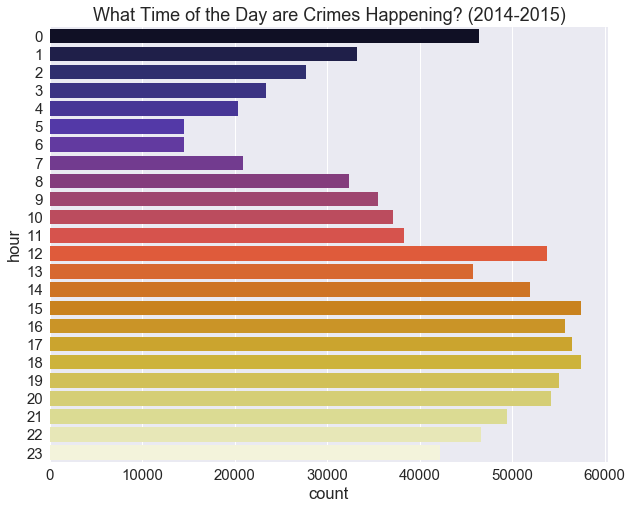

In [13]:
#Generate a timecourse of hour
hours = [i for i in range(24)]
#create the datetime series
df_hours = pd.to_datetime(df.CMPLNT_FR_TM).dt.hour
#transform the series data to dataframe
df_hours = pd.DataFrame({'hour':df_hours})
#plot using seaborn countplot
sns.countplot(y='hour', data=df_hours, palette = "CMRmap", order=hours)
plt.title('What Time of the Day are Crimes Happening? (2014-2015)')

Text(0.5,1,'SEX CRIMES')

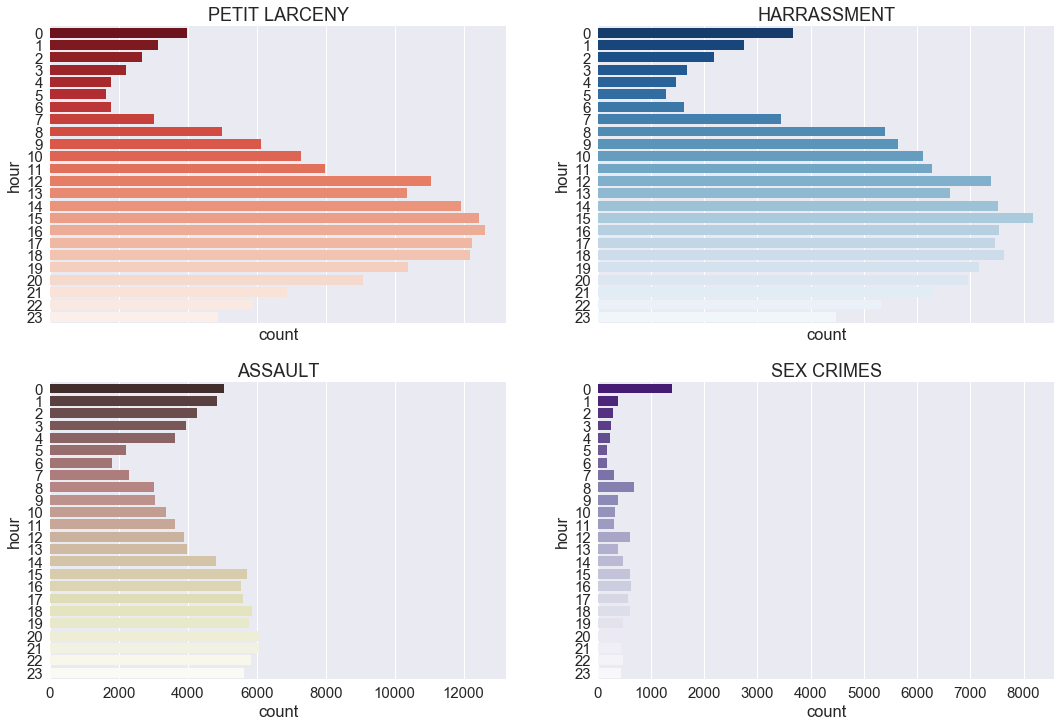

In [14]:
f, axes = plt.subplots(2, 2, figsize=(18, 12), sharex='col')

df_hours = pd.to_datetime(df.CMPLNT_FR_TM).dt.hour

crime_larceny = pd.to_datetime(df[df.OFNS_DESC == 'PETIT LARCENY'].CMPLNT_FR_TM).dt.hour 
crime_larceny = pd.DataFrame({'hour':crime_larceny})
sns.countplot(y='hour', data=crime_larceny, palette = "Reds_r", order=hours, ax=axes[0,0])
axes[0, 0].set_title('PETIT LARCENY')


crime_harrassment = pd.to_datetime(df[df.OFNS_DESC == 'HARRASSMENT 2'].CMPLNT_FR_TM).dt.hour
crime_harrassment = pd.DataFrame({'hour':crime_harrassment})
sns.countplot(y='hour', data=crime_harrassment, palette = "Blues_r", order=hours,ax=axes[0,1])
axes[0, 1].set_title('HARRASSMENT')

crime_assault = pd.to_datetime(df[df.OFNS_DESC == 'ASSAULT 3 & RELATED OFFENSES'].CMPLNT_FR_TM).dt.hour
crime_assault = pd.DataFrame({'hour':crime_assault})
sns.countplot(y='hour', data=crime_assault, palette = "pink", order=hours,ax=axes[1,0])
axes[1, 0].set_title('ASSAULT')

crime_sex = pd.to_datetime(df[df.OFNS_DESC == 'SEX CRIMES'].CMPLNT_FR_TM).dt.hour
crime_sex = pd.DataFrame({'hour':crime_sex})
sns.countplot(y='hour', data=crime_sex, palette = "Purples_r", order=hours, ax=axes[1,1])
axes[1, 1].set_title('SEX CRIMES')

### QUESTIONS 6
#### What month do the majority of crimes happen for each type of crime we are analyzing?


In [15]:
def month(date):
    month = pd.to_datetime(date).dt.month
    return pd.DataFrame({'month':month})

Text(0.5,1,'Which Month do the Majority of Crimes Happen? (2014-2015)')

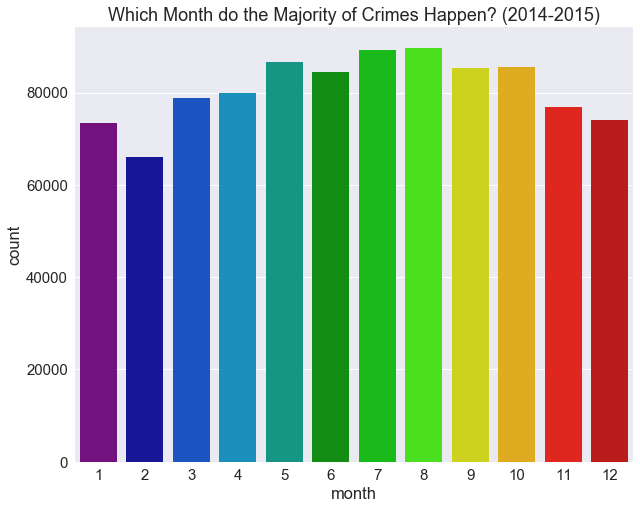

In [16]:
month_list = [i for i in range(1,13)]

sns.countplot(x='month', data=month(df.RPT_DT), palette = "nipy_spectral")
plt.title('Which Month do the Majority of Crimes Happen? (2014-2015)')

Text(0.5,1,'SEX CRIMES')

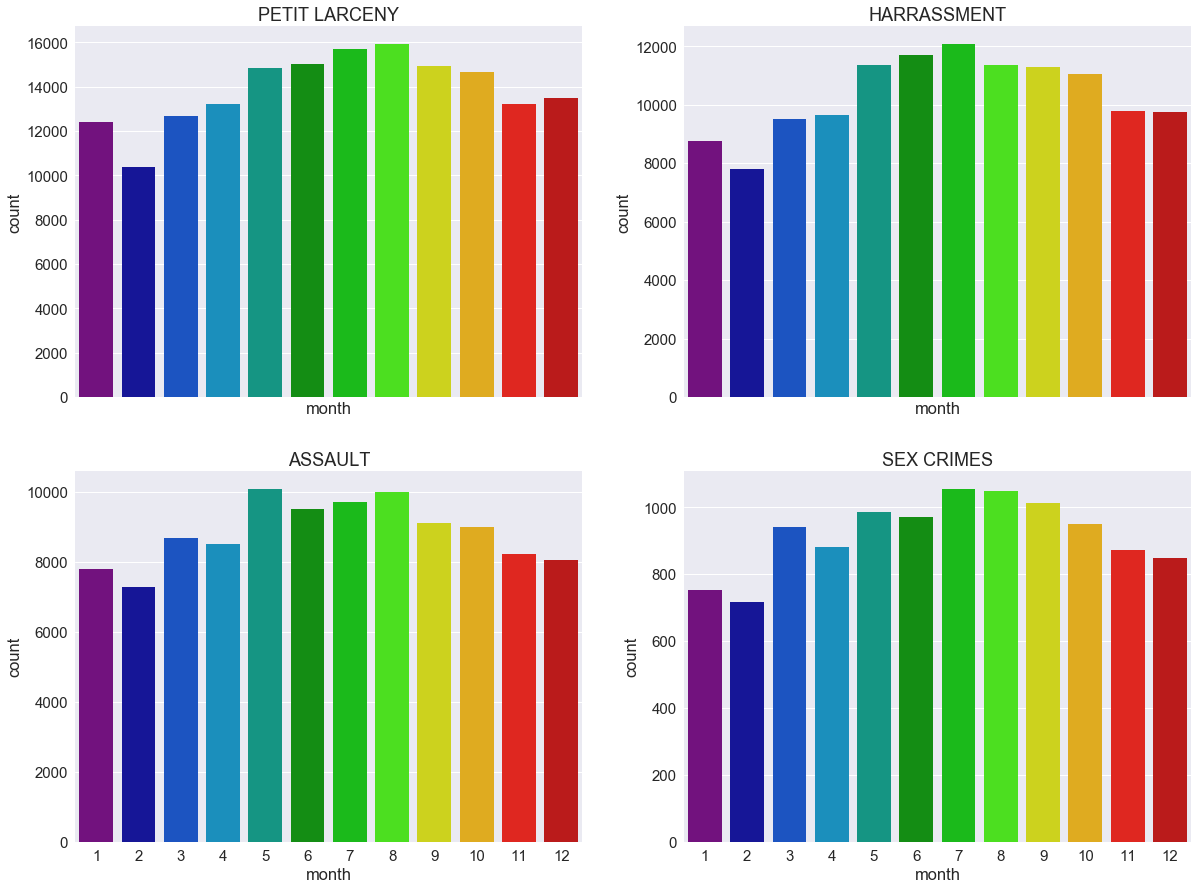

In [17]:
f, axes = plt.subplots(2, 2,figsize=(20,15),sharex='col')

crime_larceny = month(df[df.OFNS_DESC == 'PETIT LARCENY' ].RPT_DT)
sns.countplot(x='month', data=crime_larceny, palette = "nipy_spectral",  ax=axes[0,0])
axes[0, 0].set_title('PETIT LARCENY')


crime_harrassment = month(df[df.OFNS_DESC == 'HARRASSMENT 2'].RPT_DT)
sns.countplot(x='month', data=crime_harrassment, palette = "nipy_spectral", ax=axes[0,1])
axes[0, 1].set_title('HARRASSMENT')

crime_assault = month(df[df.OFNS_DESC == 'ASSAULT 3 & RELATED OFFENSES'].RPT_DT)
sns.countplot(x='month', data=crime_assault, palette = "nipy_spectral", ax=axes[1,0])
axes[1, 0].set_title('ASSAULT')

crime_sex = month(df[df.OFNS_DESC == 'SEX CRIMES'].RPT_DT)
sns.countplot(x='month', data=crime_sex, palette = "nipy_spectral", ax=axes[1,1])
axes[1, 1].set_title('SEX CRIMES')

Text(0.5,1,'What Day of the Week do most Crimes Happen? (2014-2015)')

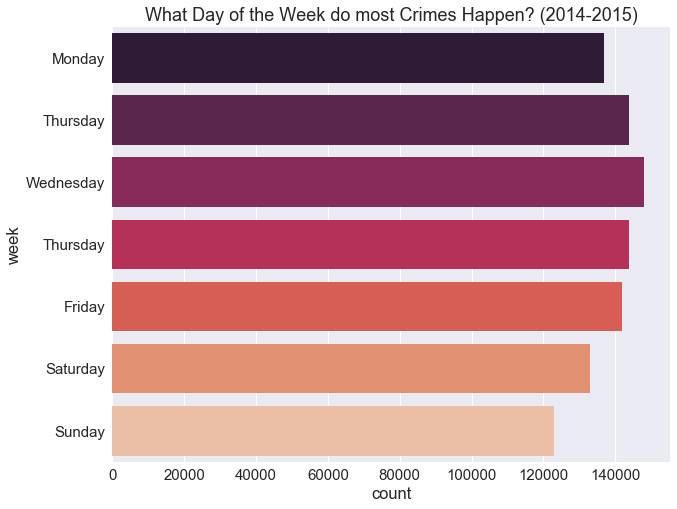

In [18]:
weekday_list = ["Monday","Thursday","Wednesday","Thursday","Friday","Saturday","Sunday"]
weekday = pd.to_datetime(df.RPT_DT).dt.weekday_name
weekday = pd.DataFrame({'week':weekday})
sns.countplot(y='week', data=weekday, palette = "rocket", order=weekday_list)
plt.title('What Day of the Week do most Crimes Happen? (2014-2015)')

### QUESTIONS 7
#### What borough do we consider the most dangerous and why? 
#### Our interpretation of the data. 

Text(0.5,1,'Harrassment')

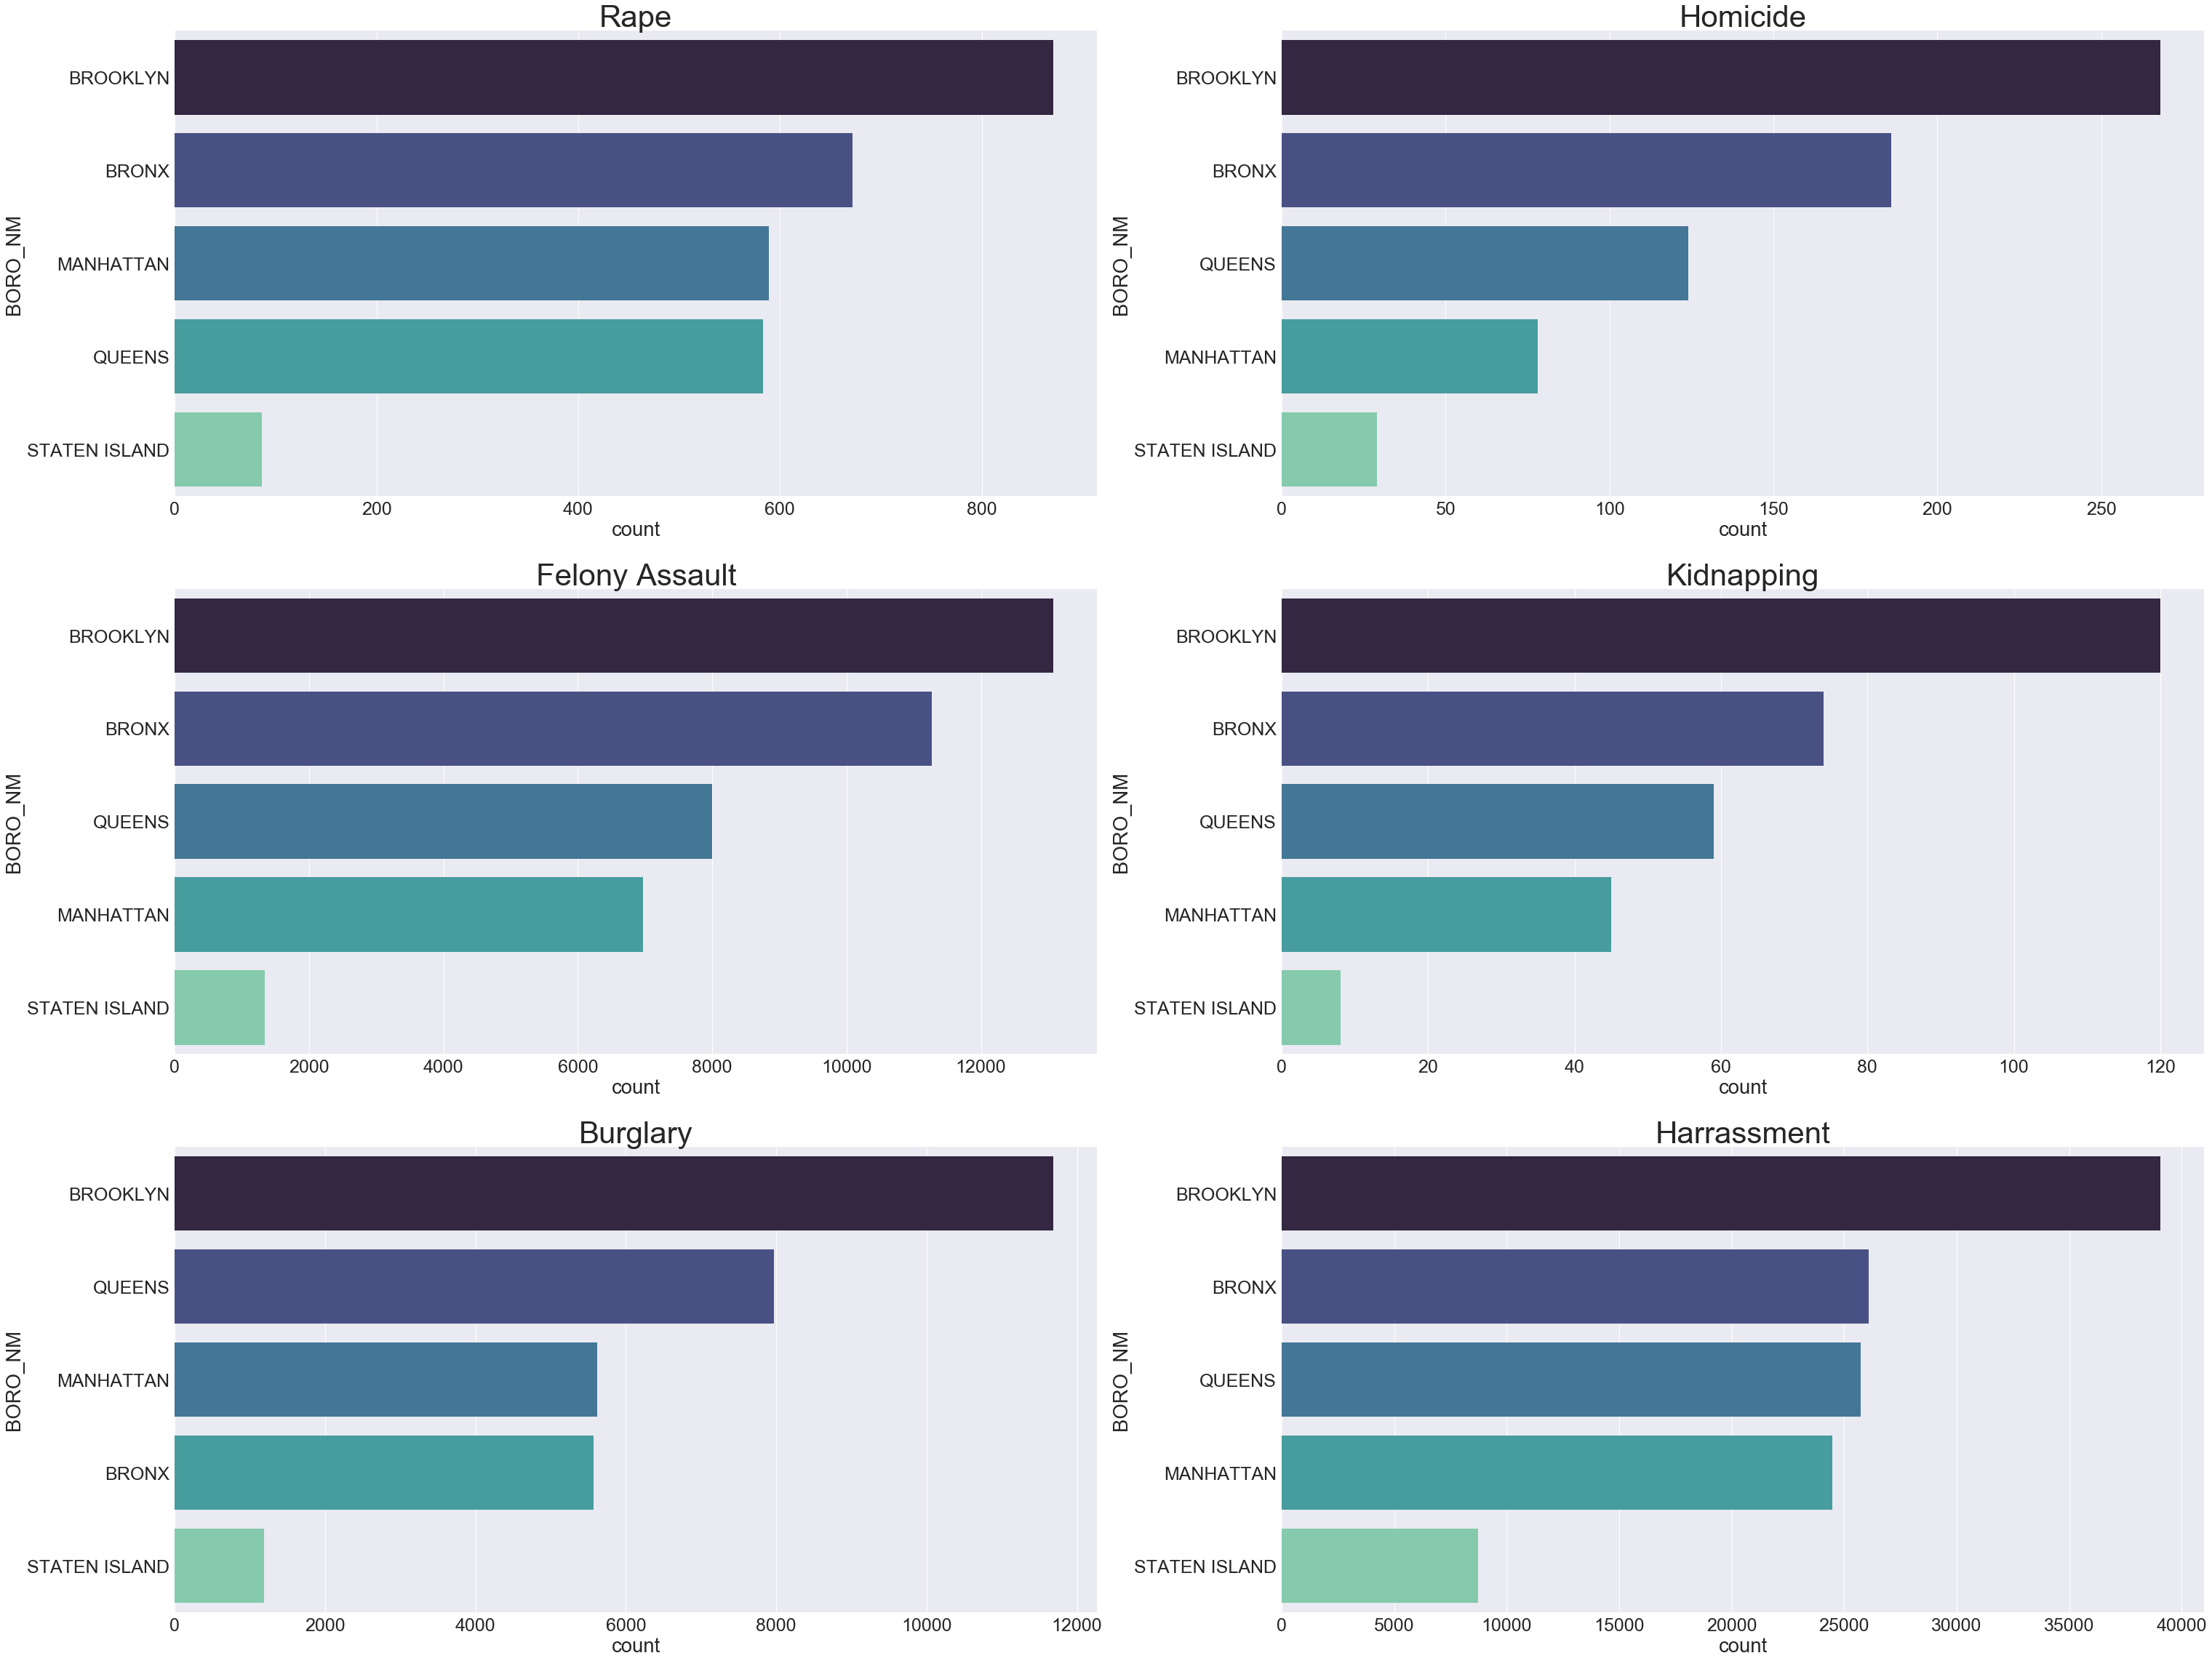

In [19]:
crime_kidnapping = df[df.OFNS_DESC == 'KIDNAPPING & RELATED OFFENSES']
crime_homicide = df[df.OFNS_DESC == 'MURDER & NON-NEGL. MANSLAUGHTER']
crime_fassault = df[df.OFNS_DESC == 'FELONY ASSAULT']
crime_rape = df[df.OFNS_DESC == 'RAPE']
crime_burglery = df[df.OFNS_DESC == 'BURGLARY']
crime_harrass = df[df.OFNS_DESC == 'HARRASSMENT 2']

sns.set(font_scale=2.5)
f, axes = plt.subplots(3, 2, figsize=(50, 40))
sns.set(font_scale=3.5, style="whitegrid")
sns.countplot(y = crime_rape['BORO_NM'], ax=axes[0,0] , palette = "mako", order= crime_rape['BORO_NM'].value_counts().index )
axes[0, 0].set_title('Rape')

sns.countplot(y = crime_homicide['BORO_NM'], ax=axes[0,1], palette = "mako", order= crime_homicide['BORO_NM'].value_counts().index)
axes[0, 1].set_title('Homicide')

sns.countplot(y = crime_fassault['BORO_NM'], ax=axes[1,0], palette = "mako", order= crime_fassault['BORO_NM'].value_counts().index)
axes[1, 0].set_title('Felony Assault')

sns.countplot(y = crime_kidnapping['BORO_NM'], ax=axes[1,1], palette = "mako", order= crime_kidnapping['BORO_NM'].value_counts().index)
axes[1, 1].set_title('Kidnapping')

sns.countplot(y = crime_burglery['BORO_NM'], ax=axes[2,0], palette = "mako", order= crime_burglery['BORO_NM'].value_counts().index)
axes[2, 0].set_title('Burglary')

sns.countplot(y = crime_harrass['BORO_NM'], ax=axes[2,1], palette = "mako", order= crime_harrass['BORO_NM'].value_counts().index)
axes[2, 1].set_title('Harrassment')



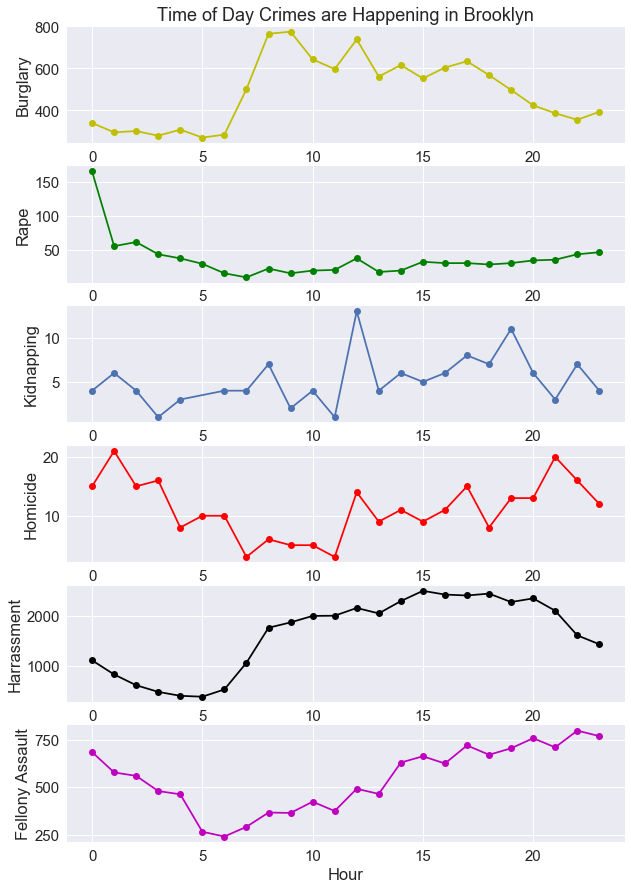

In [20]:
sns.set(font_scale=1.5)
def timedict(dataframe):
    timeDict = {}
    for index, row in dataframe.iterrows():
    #print(row['hour'])
        if row['hour'] in timeDict:
            timeDict[row['hour']] += 1
        else:
            timeDict[row['hour']] = 1
    return timeDict

crime_burglary = pd.to_datetime(dfBrooklyn[dfBrooklyn.OFNS_DESC == 'BURGLARY'].CMPLNT_FR_TM).dt.hour
crime_burglary = pd.DataFrame({'hour':crime_burglary})
xb = timedict(crime_burglary).keys()
yb = timedict(crime_burglary).values()
xb, yb = zip(*sorted(zip(xb, yb)))

crime_rape = pd.to_datetime(dfBrooklyn[dfBrooklyn.OFNS_DESC == 'RAPE'].CMPLNT_FR_TM).dt.hour
crime_rape = pd.DataFrame({'hour':crime_rape})
xr = timedict(crime_rape).keys()
yr = timedict(crime_rape).values()
xr, yr = zip(*sorted(zip(xr, yr)))

crime_homicide = pd.to_datetime(dfBrooklyn[dfBrooklyn.OFNS_DESC == 'MURDER & NON-NEGL. MANSLAUGHTER'].CMPLNT_FR_TM).dt.hour
crime_homicide = pd.DataFrame({'hour':crime_homicide})
xm = timedict(crime_homicide).keys()
ym = timedict(crime_homicide).values()
xm, ym = zip(*sorted(zip(xm, ym)))

crime_kidnap = pd.to_datetime(dfBrooklyn[dfBrooklyn.OFNS_DESC == 'KIDNAPPING & RELATED OFFENSES'].CMPLNT_FR_TM).dt.hour
crime_kidnap = pd.DataFrame({'hour':crime_kidnap})
xk = timedict(crime_kidnap).keys()
yk = timedict(crime_kidnap).values()
xk, yk = zip(*sorted(zip(xk, yk)))

crime_assault = pd.to_datetime(dfBrooklyn[dfBrooklyn.OFNS_DESC == 'FELONY ASSAULT'].CMPLNT_FR_TM).dt.hour
crime_assault = pd.DataFrame({'hour':crime_assault})
xa = timedict(crime_assault).keys()
ya = timedict(crime_assault).values()
xa, ya = zip(*sorted(zip(xa, ya)))

crime_harrass = pd.to_datetime(dfBrooklyn[dfBrooklyn.OFNS_DESC == 'HARRASSMENT 2'].CMPLNT_FR_TM).dt.hour
crime_harrass = pd.DataFrame({'hour':crime_harrass})
xh = timedict(crime_harrass).keys()
yh = timedict(crime_harrass).values()
xh, yh = zip(*sorted(zip(xh, yh)))

plt.rcParams['figure.figsize'] = (10, 15)
plt.subplot(6, 1, 1)
plt.plot(xb, yb, 'yo-')
plt.title('Time of Day Crimes are Happening in Brooklyn')
plt.ylabel('Burglary')

plt.subplot(6, 1, 2)
plt.plot(xr, yr, 'go-')
plt.ylabel('Rape')

plt.subplot(6, 1, 3)
plt.plot(xk, yk, 'o-')
plt.ylabel('Kidnapping')

plt.subplot(6, 1, 4)
plt.plot(xm, ym, 'ro-')
plt.ylabel('Homicide')

plt.subplot(6, 1, 5)
plt.plot(xh, yh, 'ko-')
plt.ylabel('Harrassment')

plt.subplot(6, 1, 6)
plt.plot(xa, ya, 'mo-')
plt.xlabel('Hour')
plt.ylabel('Fellony Assault')
plt.show()
